In [1]:
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants
import ROOT
import numpy as np

Welcome to JupyROOT 6.24/04


In [2]:
@ROOT.Numba.Declare(['float', 'float', 'float'], 'float')
def get_theta(px, py, pz):
    return np.degrees(np.arctan2(np.sqrt(px**2 + py**2), pz))

@ROOT.Numba.Declare(['float', 'float'], 'float')
def get_phi(px, py):
    return np.degrees(np.arctan2(py, px))


In [24]:
# this is bad repeatable code and i know it but im hacking quickly here
def plot_kinematics(channel: str, particle: str, df: ROOT.RDataFrame):
    if particle not in ['proton', 'kaon', 'pion', 'kshort_pi+', 'kshort_pi-']:
        print(f'Particle {particle}_{channel} not supported')
        raise ValueError(f'Acceptable particles are proton, kaon, pion, kshort_pi+, kshort_pi-')
    if channel not in ['pipkmks', 'pimkpks']:
        print(f'Channel {channel} not supported')
        raise ValueError(f'Acceptable channels are pipkmks, pimkpks')
    
    if channel == 'pipkmks':
        kaon = 'km'
        pion = 'pip1'
        ks_pip = 'pip2'
        ks_pim = 'pim'
    elif channel == 'pimkpks':
        kaon = 'kp'
        pion = 'pim1'
        ks_pip = 'pip'
        ks_pim = 'pim2'

    if particle == 'proton':
        hist_px = df.Histo1D((f'{particle}_{channel}_px', f'{particle}_{channel}_px', 200, -2.0, 2.0), 'p_px')
        hist_py = df.Histo1D((f'{particle}_{channel}_py', f'{particle}_{channel}_py', 200, -2.0, 2.0), 'p_py')
        hist_pz = df.Histo1D((f'{particle}_{channel}_pz', f'{particle}_{channel}_pz', 200, -2.0, 2.0), 'p_pz')
        hist_p = df.Define('p', 'sqrt(p_px*p_px + p_py*p_py + p_pz*p_pz)').Histo1D((f'{particle}_{channel}_p', f'{particle}_{channel}_p', 100, 0.0, 2.0), 'p')
        hist_theta = df.Define('theta', 'Numba::get_theta(p_px, p_py, p_pz)').Histo1D((f'{particle}_{channel}_theta', f'{particle}_{channel}_theta', 100, 0.0, 180.0), 'theta')
        hist_phi = df.Define('phi', 'Numba::get_phi(p_px, p_py)').Histo1D((f'{particle}_{channel}_phi', f'{particle}_{channel}_phi', 100, -185.0, 185.0), 'phi')
    elif particle == 'kaon':
        hist_px = df.Histo1D((f'{particle}_{channel}_px', f'{particle}_{channel}_px', 200, -2.0, 2.0), f'{kaon}_px')
        hist_py = df.Histo1D((f'{particle}_{channel}_py', f'{particle}_{channel}_py', 200, -2.0, 2.0), f'{kaon}_py')
        hist_pz = df.Histo1D((f'{particle}_{channel}_pz', f'{particle}_{channel}_pz', 200, -2.0, 2.0), f'{kaon}_pz')
        hist_p = df.Define('p', f'sqrt({kaon}_px*{kaon}_px + {kaon}_py*{kaon}_py + {kaon}_pz*{kaon}_pz)').Histo1D((f'{particle}_{channel}_p', f'{particle}_{channel}_p', 100, 0.0, 2.0), 'p')
        hist_theta = df.Define('theta', f'Numba::get_theta({kaon}_px, {kaon}_py, {kaon}_pz)').Histo1D((f'{particle}_{channel}_theta', f'{particle}_{channel}_theta', 100, 0.0, 180.0), 'theta')
        hist_phi = df.Define('phi', f'Numba::get_phi({kaon}_px, {kaon}_py)').Histo1D((f'{particle}_{channel}_phi', f'{particle}_{channel}_phi', 100, -185.0, 185.0), 'phi')
    elif particle == 'pion':
        hist_px = df.Histo1D((f'{particle}_{channel}_px', f'{particle}_{channel}_px', 200, -2.0, 2.0), f'{pion}_px')
        hist_py = df.Histo1D((f'{particle}_{channel}_py', f'{particle}_{channel}_py', 200, -2.0, 2.0), f'{pion}_py')
        hist_pz = df.Histo1D((f'{particle}_{channel}_pz', f'{particle}_{channel}_pz', 200, -2.0, 2.0), f'{pion}_pz')
        hist_p = df.Define('p', f'sqrt({pion}_px*{pion}_px + {pion}_py*{pion}_py + {pion}_pz*{pion}_pz)').Histo1D((f'{particle}_{channel}_p', f'{particle}_{channel}_p', 100, 0.0, 2.0), 'p')
        hist_theta = df.Define('theta', f'Numba::get_theta({pion}_px, {pion}_py, {pion}_pz)').Histo1D((f'{particle}_{channel}_theta', f'{particle}_{channel}_theta', 100, 0.0, 180.0), 'theta')
        hist_phi = df.Define('phi', f'Numba::get_phi({pion}_px, {pion}_py)').Histo1D((f'{particle}_{channel}_phi', f'{particle}_{channel}_phi', 100, -185.0, 185.0), 'phi')
    elif particle == 'kshort_pi+':
        hist_px = df.Histo1D((f'{particle}_{channel}_px', f'{particle}_{channel}_px', 200, -2.0, 2.0), f'{ks_pip}_px')
        hist_py = df.Histo1D((f'{particle}_{channel}_py', f'{particle}_{channel}_py', 200, -2.0, 2.0), f'{ks_pip}_py')
        hist_pz = df.Histo1D((f'{particle}_{channel}_pz', f'{particle}_{channel}_pz', 200, -2.0, 2.0), f'{ks_pip}_pz')
        hist_p = df.Define('p', f'sqrt({ks_pip}_px*{ks_pip}_px + {ks_pip}_py*{ks_pip}_py + {ks_pip}_pz*{ks_pip}_pz)').Histo1D((f'{particle}_{channel}_p', f'{particle}_{channel}_p', 100, 0.0, 2.0), 'p')
        hist_theta = df.Define('theta', f'Numba::get_theta({ks_pip}_px, {ks_pip}_py, {ks_pip}_pz)').Histo1D((f'{particle}_{channel}_theta', f'{particle}_{channel}_theta', 100, 0.0, 180.0), 'theta')
        hist_phi = df.Define('phi', f'Numba::get_phi({ks_pip}_px, {ks_pip}_py)').Histo1D((f'{particle}_{channel}_phi', f'{particle}_{channel}_phi', 100, -185.0, 185.0), 'phi')
    elif particle == 'kshort_pi-':
        hist_px = df.Histo1D((f'{particle}_{channel}_px', f'{particle}_{channel}_px', 200, -2.0, 2.0), f'{ks_pim}_px')
        hist_py = df.Histo1D((f'{particle}_{channel}_py', f'{particle}_{channel}_py', 200, -2.0, 2.0), f'{ks_pim}_py')
        hist_pz = df.Histo1D((f'{particle}_{channel}_pz', f'{particle}_{channel}_pz', 200, -2.0, 2.0), f'{ks_pim}_pz')
        hist_p = df.Define('p', f'sqrt({ks_pim}_px*{ks_pim}_px + {ks_pim}_py*{ks_pim}_py + {ks_pim}_pz*{ks_pim}_pz)').Histo1D((f'{particle}_{channel}_p', f'{particle}_{channel}_p', 100, 0.0, 2.0), 'p')
        hist_theta = df.Define('theta', f'Numba::get_theta({ks_pim}_px, {ks_pim}_py, {ks_pim}_pz)').Histo1D((f'{particle}_{channel}_theta', f'{particle}_{channel}_theta', 100, 0.0, 180.0), 'theta')
        hist_phi = df.Define('phi', f'Numba::get_phi({ks_pim}_px, {ks_pim}_py)').Histo1D((f'{particle}_{channel}_phi', f'{particle}_{channel}_phi', 100, -185.0, 185.0), 'phi')
    
    return hist_px.GetValue(), hist_py.GetValue(), hist_pz.GetValue(), hist_p.GetValue(), hist_theta.GetValue(), hist_phi.GetValue()

In [25]:
run_period = 'spring'
data_type = 'signal'
df_pipkmks = tools.get_dataframe('pipkmks', run_period, data_type)
df_pimkpks = tools.get_dataframe('pimkpks', run_period, data_type)

In [26]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)

### Proton Kinematics

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


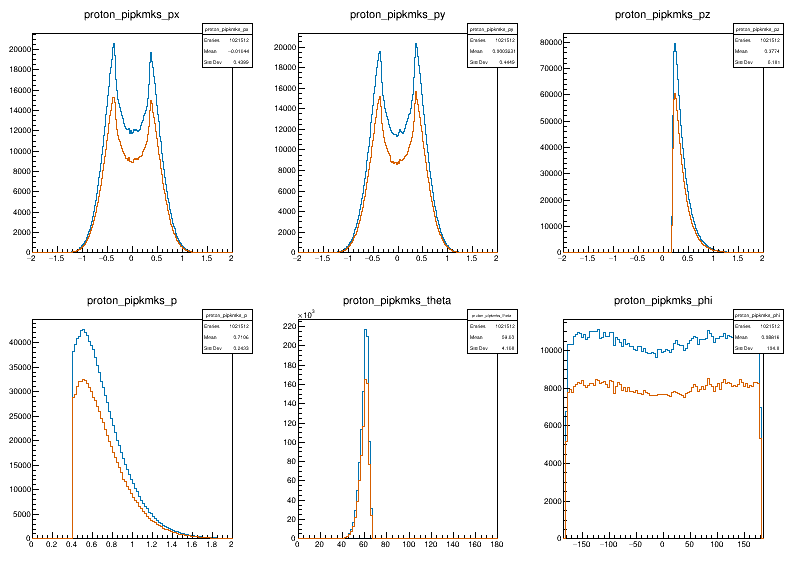

In [27]:
c = ROOT.TCanvas("c", "c", 800, 600)
c.Divide(3, 2)

proton_hists_pipkmks = plot_kinematics('pipkmks', 'proton', df_pipkmks)
proton_hists_pimkpks = plot_kinematics('pimkpks', 'proton', df_pimkpks)
for i, hist_pipkmks in enumerate(proton_hists_pipkmks):
    c.cd(i+1)
    hist_pimkpks = proton_hists_pimkpks[i]
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks.Draw()
    hist_pimkpks.Draw('same')
c.Draw()

### Kaon Kinematics

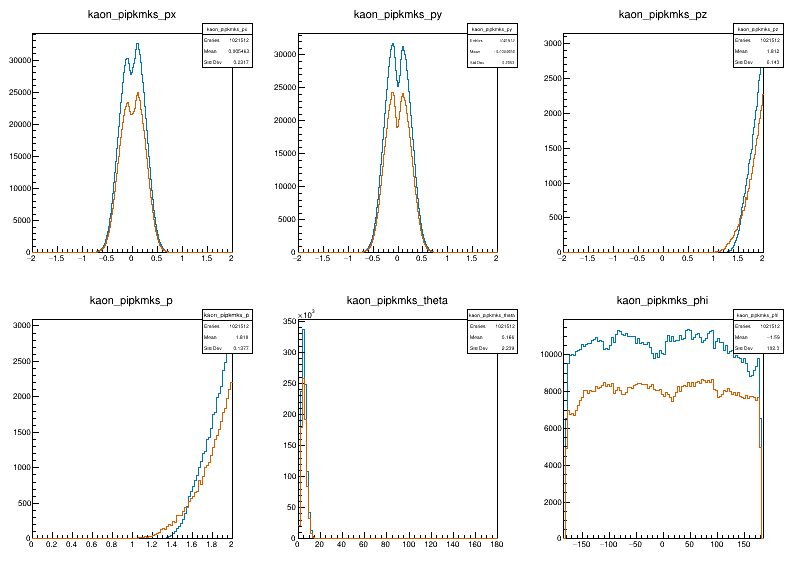

In [28]:
kaon_hists_pipkmks = plot_kinematics('pipkmks', 'kaon', df_pipkmks)
kaon_hists_pimkpks = plot_kinematics('pimkpks', 'kaon', df_pimkpks)
for i, hist_pipkmks in enumerate(kaon_hists_pipkmks):
    c.cd(i+1)
    hist_pimkpks = kaon_hists_pimkpks[i]
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks.Draw()
    hist_pimkpks.Draw('same')
c.Draw()

### Pion Kinematics

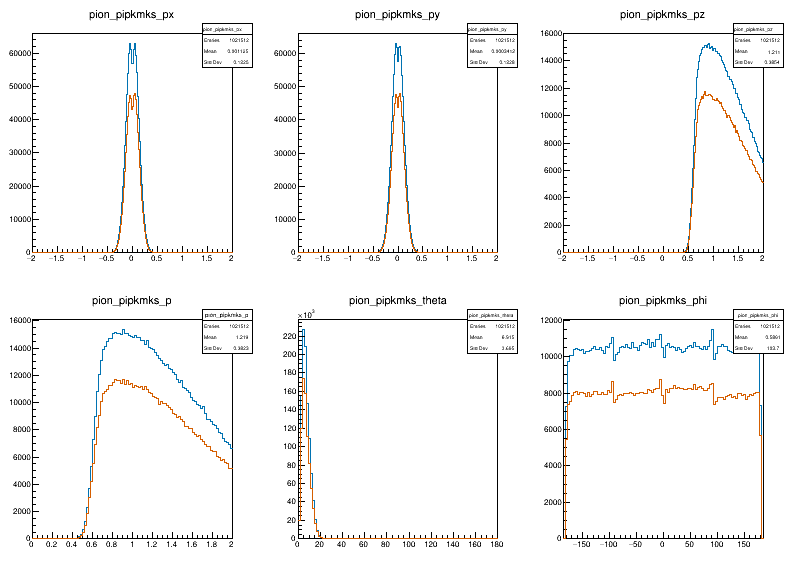

In [29]:
pion_hists_pipkmks = plot_kinematics('pipkmks', 'pion', df_pipkmks)
pion_hists_pimkpks = plot_kinematics('pimkpks', 'pion', df_pimkpks)
for i, hist_pipkmks in enumerate(pion_hists_pipkmks):
    c.cd(i+1)
    hist_pimkpks = pion_hists_pimkpks[i]
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks.Draw()
    hist_pimkpks.Draw('same')
c.Draw()

### KShort Pi+ Kinematics

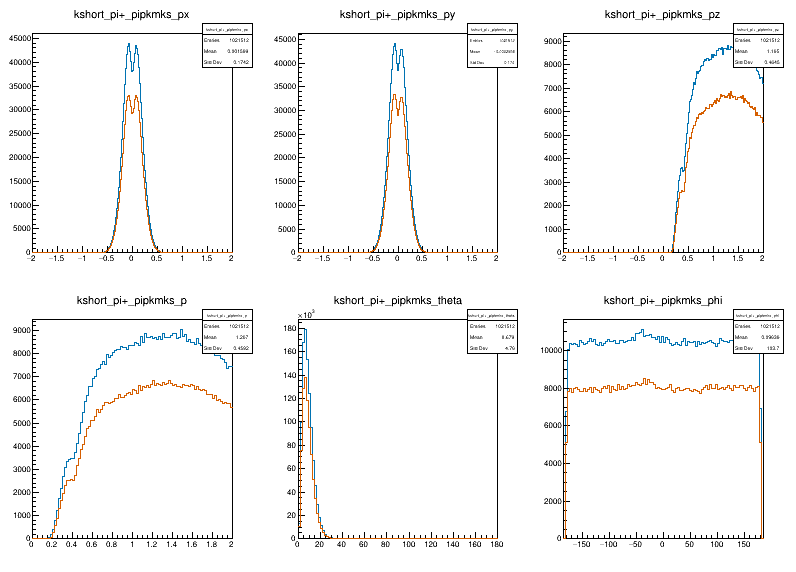

In [30]:
kspip_hists_pipkmks = plot_kinematics('pipkmks', 'kshort_pi+', df_pipkmks)
kspip_hists_pimkpks = plot_kinematics('pimkpks', 'kshort_pi+', df_pimkpks)
for i, hist_pipkmks in enumerate(kspip_hists_pipkmks):
    c.cd(i+1)
    hist_pimkpks = kspip_hists_pimkpks[i]
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks.Draw()
    hist_pimkpks.Draw('same')
c.Draw()

### KShort Pi- Kinematics

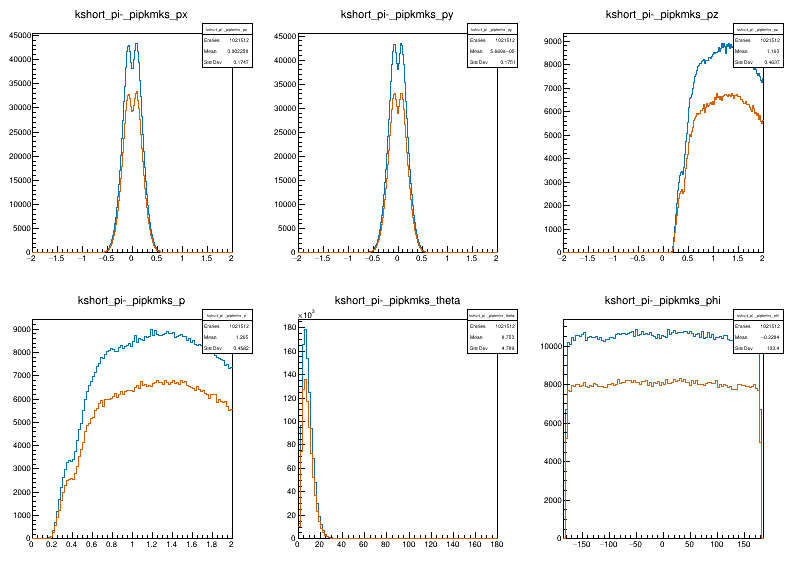

In [31]:
kspim_hists_pipkmks = plot_kinematics('pipkmks', 'kshort_pi-', df_pipkmks)
kspim_hists_pimkpks = plot_kinematics('pimkpks', 'kshort_pi-', df_pimkpks)
for i, hist_pipkmks in enumerate(kspim_hists_pipkmks):
    c.cd(i+1)
    hist_pimkpks = kspim_hists_pimkpks[i]
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pipkmks.Draw()
    hist_pimkpks.Draw('same')
c.Draw()